In [28]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 15.8 MB/s 
     |████████████████████████████████| 9.8 MB 39.4 MB/s 
     |████████████████████████████████| 3.6 MB 40.5 MB/s 
     |████████████████████████████████| 5.8 MB 44.6 MB/s 
     |████████████████████████████████| 756 kB 41.8 MB/s 
     |████████████████████████████████| 133 kB 54.8 MB/s 
     |████████████████████████████████| 793 kB 39.7 MB/s 
     |████████████████████████████████| 281 kB 40.9 MB/s 
     |████████████████████████████████| 275 kB 48.1 MB/s 
     |████████████████████████████████| 564 kB 50.7 MB/s 
     |████████████████████████████████| 251 kB 55.1 MB/s 
     |████████████████████████████████| 428 kB 54.3 MB/s 
     |████████████████████████████████| 132 kB 46.2 MB/s 
     |████████████████████████████████| 381 kB 33.2 MB/s 
     |████████████████████████████████| 76 kB 5.6 MB/s 
     |███████████████████████████

In [29]:
!pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.1 MB/s 


In [ ]:
import pickle
with open('xgb_best.pickle', 'rb') as handle:
    xgb_best = pickle.load(handle)

with open('ebm_best.pickle', 'rb') as handle:
    ebm_best = pickle.load(handle)

with open('spline_best.pickle', 'rb') as handle:
    spline_best = pickle.load(handle)

with open('nam_best.pickle', 'rb') as handle:
    nam_best = pickle.load(handle)

We use the GAM models to fit the data.
- EBM: explainable boosting machines.
- XGB: we use the depth-1 tree (stumps) to create a GAM and visualize them


# Visualization

## XGB

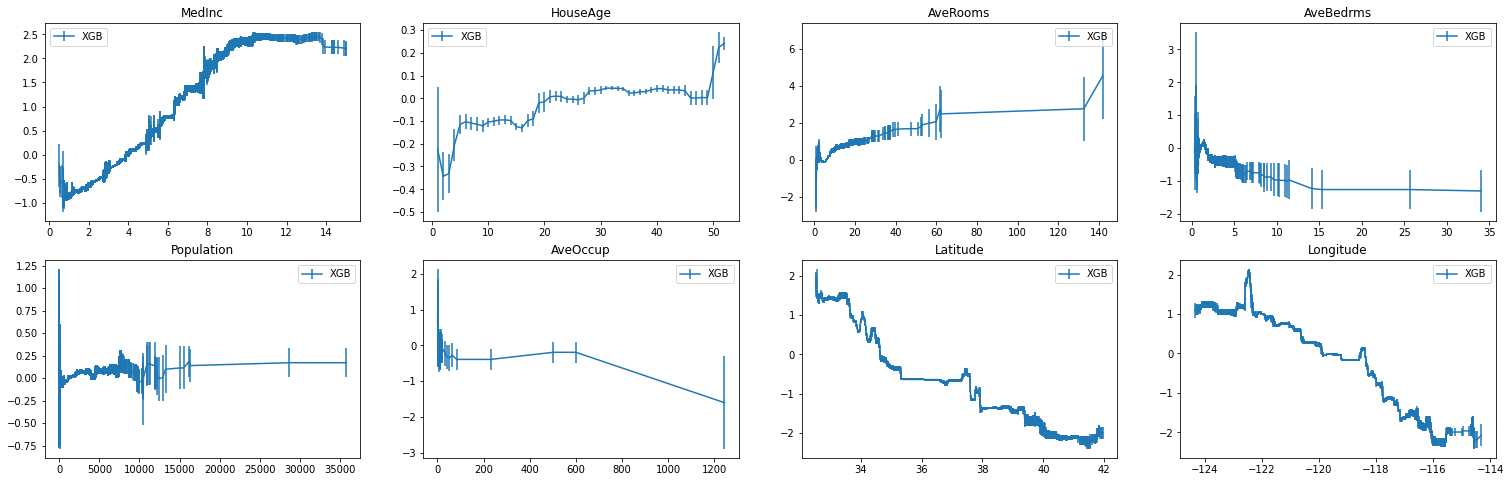

In [ ]:
from vis_utils import vis_main_effects

fig, axes = vis_main_effects({
    'XGB': xgb_best.get_GAM_plot_dataframe(),


## Spline

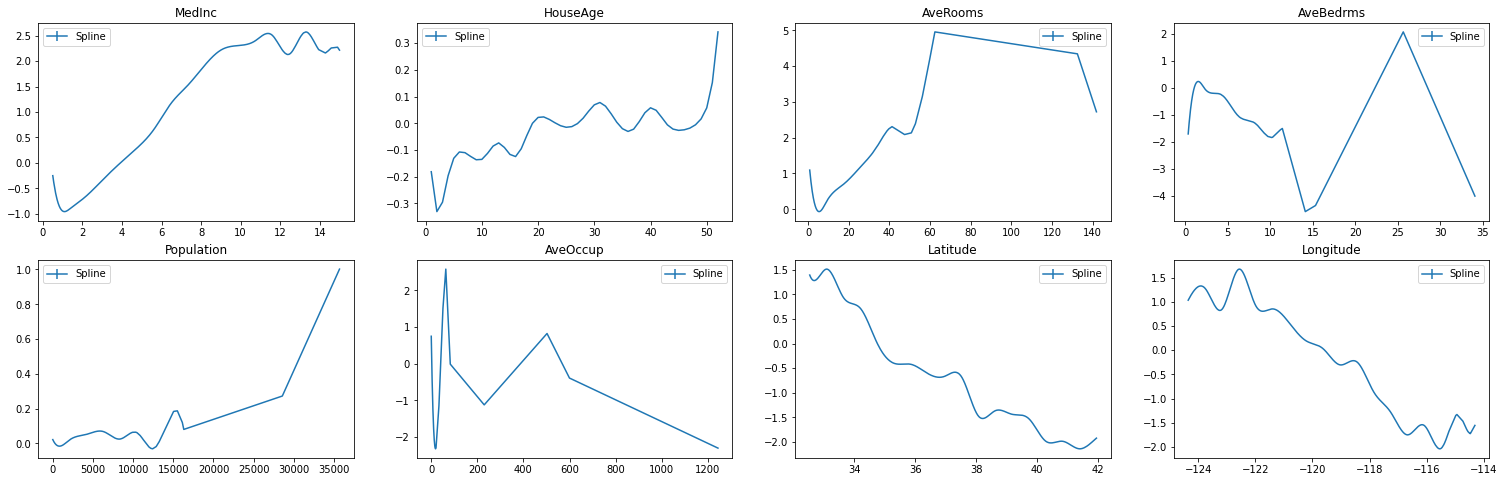

In [ ]:
from vis_utils import vis_main_effects

fig, axes = vis_main_effects({
    'Spline': spline_best.get_GAM_plot_dataframe(),

})

## XGB vs Spline

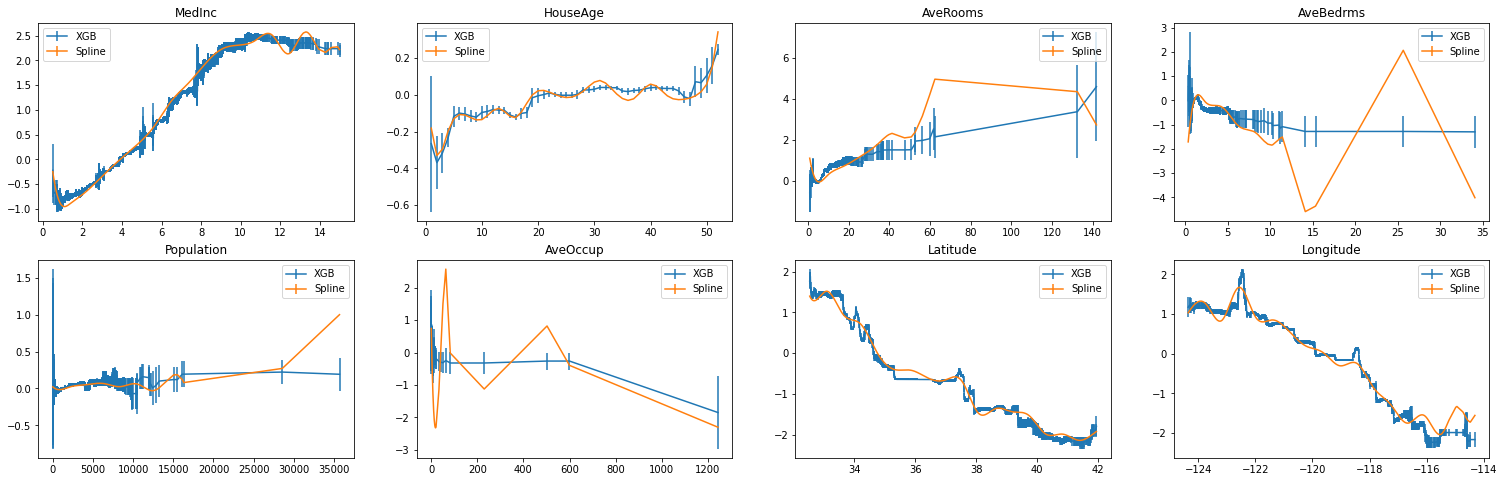

In [ ]:
from vis_utils import vis_main_effects

fig, axes = vis_main_effects({
   'XGB': xgb_best.get_GAM_plot_dataframe(),
    'Spline': spline_best.get_GAM_plot_dataframe(),

})

## EBM

In [ ]:
ebm_best = ebm.explain_global()
show(ebm_best)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


## NAM 

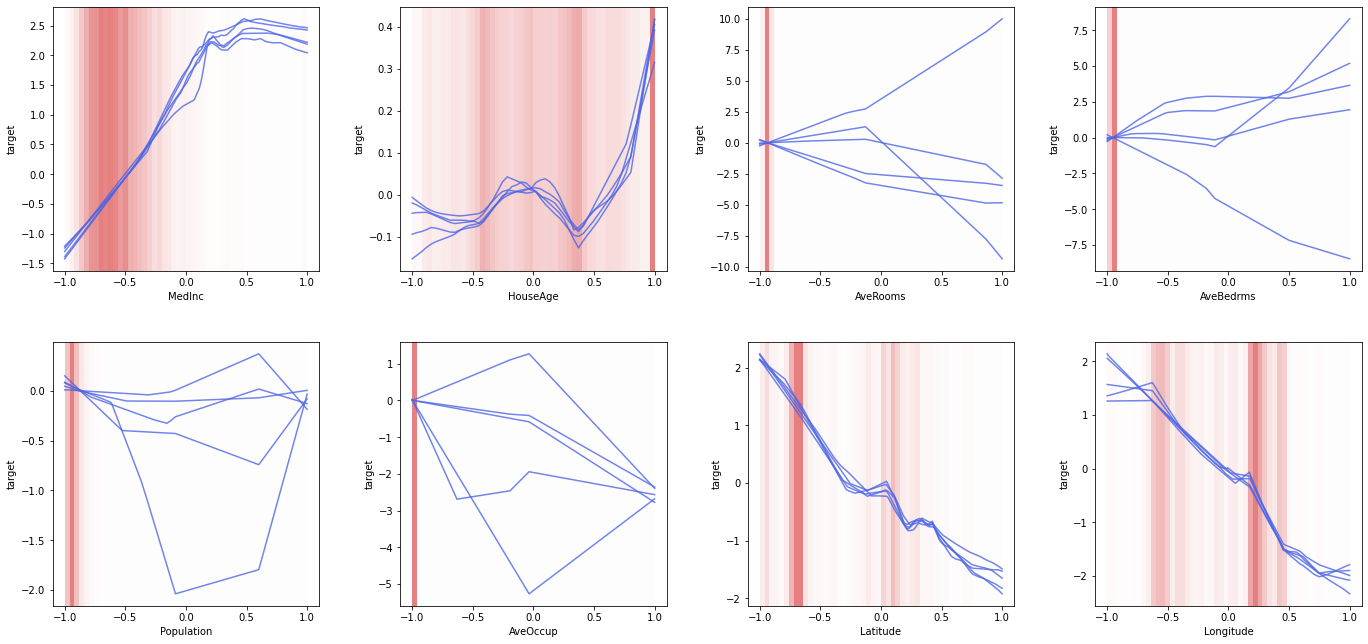

In [ ]:
nam_plot(dataset, nam_best)

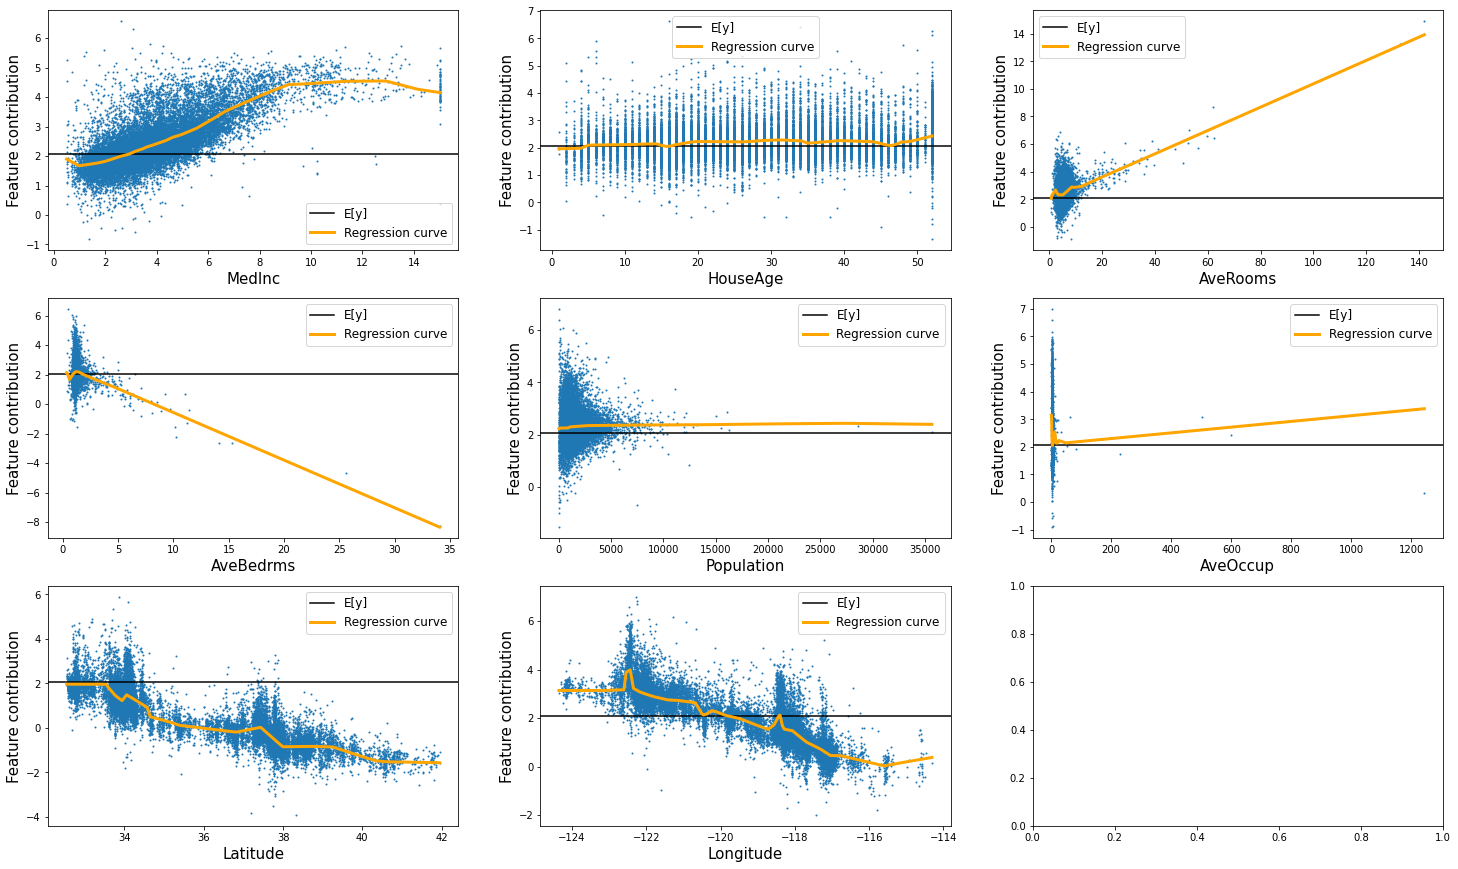

In [ ]:
trained_model = load_model(nam_best)
fig = partial_residual_plot(trained_model, dataset)

## Shap

[09:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


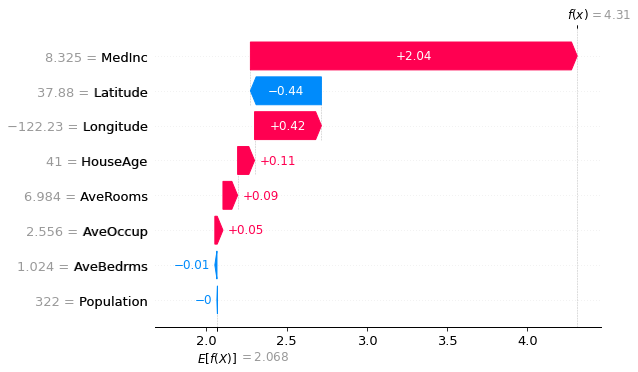

In [ ]:
import xgboost
import shap

# train an XGBoost model
X = df
y= housing['target']
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[1])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[100])

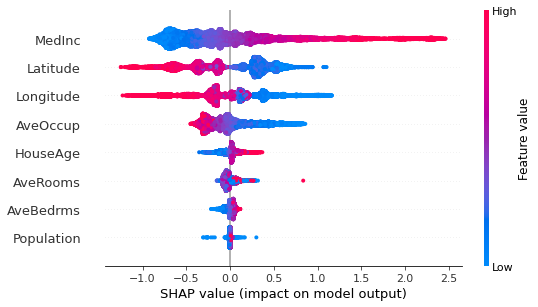

In [ ]:
shap.plots.beeswarm(shap_values)

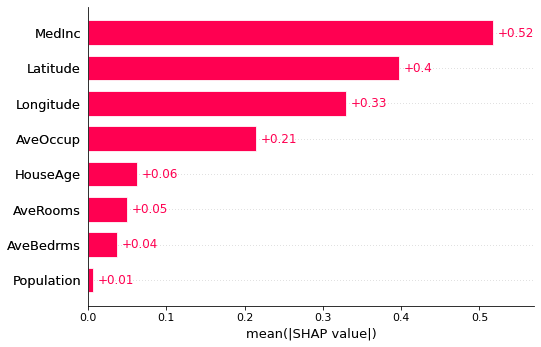

In [ ]:
shap.plots.bar(shap_values)

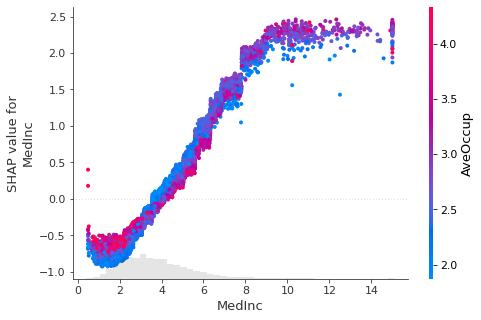

In [ ]:
shap.plots.scatter(shap_values[:,"MedInc"], color=shap_values)

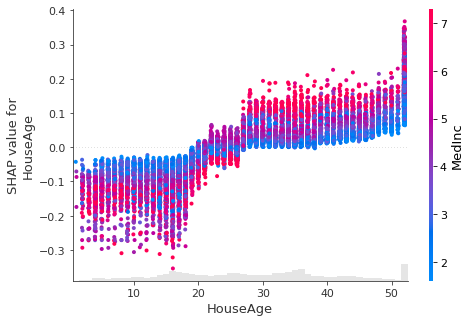

In [ ]:
shap.plots.scatter(shap_values[:,"HouseAge"], color=shap_values)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[:200])